    USE ESCAPE KEY TO EXIT THE WINDOWS
    IGNORE ANY ERRORS IN TRACKBAR POS
(Trial code, officiial implementation is in code 5)
This code genrerates a hsv trackbar so that you can vary the values
and find at what upper and lower hsv range you can erase the background.
The values returned by the function printer (at the end) need to be copied.

In [11]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def callback(x):
    global H_low,H_high,S_low,S_high,V_low,V_high
    #assign trackbar position value to H,S,V High and low variable
    H_low = cv2.getTrackbarPos('low H','controls')
    H_high = cv2.getTrackbarPos('high H','controls')
    S_low = cv2.getTrackbarPos('low S','controls')
    S_high = cv2.getTrackbarPos('high S','controls')
    V_low = cv2.getTrackbarPos('low V','controls')
    V_high = cv2.getTrackbarPos('high V','controls')

In [13]:
def printer():
    print("Lower : ",[H_low, S_low, V_low])
    print("Higher : ",[H_high, S_high, V_high])

In [14]:
cv2.namedWindow('controls',2)
cv2.resizeWindow("controls", 550,10);

In [15]:
#global variable
H_low = 0
H_high = 179
S_low= 0
S_high = 255
V_low= 0
V_high = 255

In [16]:
#create trackbars for high,low H,S,V 
cv2.createTrackbar('low H','controls',0,179,callback)
cv2.createTrackbar('high H','controls',179,179,callback)

cv2.createTrackbar('low S','controls',0,255,callback)
cv2.createTrackbar('high S','controls',255,255,callback)

cv2.createTrackbar('low V','controls',0,255,callback)
cv2.createTrackbar('high V','controls',255,255,callback)

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


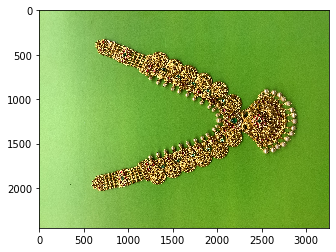

In [19]:
image = cv2.imread('necklace_1.jpeg')
#image = image[250:1750 , 800:2000]
small = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
vsmall = cv2.resize(small, (0,0), fx=0.5, fy=0.5) 
vlc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(vlc)

In [ ]:
while(1):
    #read source image
    img=vsmall
    #convert sourece image to HSC color mode
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_low = np.array([H_low, S_low, V_low], np.uint8)
    hsv_high = np.array([H_high, S_high, V_high], np.uint8)
    
    #making mask for hsv range
    mask = cv2.inRange(hsv, hsv_low, hsv_high)
    #print (mask)
    #masking HSV value selected color becomes black
    res = cv2.bitwise_and(img, img, mask=mask)
        
    

    #show image
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)

    #waitfor the user to press escape and break the while loop 
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
#destroys all window
cv2.destroyAllWindows()


In [10]:
printer()

Lower :  [0, 0, 0]
Higher :  [164, 255, 255]
